## ElevateHealth: CVD model

Based on Toppila et al. "Cardiovascular event rate and death in high‐risk secondary prevention patient cohort in Finland: A registry study", 2022

In [5]:
import numpy as np
from matplotlib import pyplot as plt
import seaborn as sns
import pandas as pd
import plotly.graph_objects as go
import plotly.express as px
from matplotlib import cm
from matplotlib.ticker import LinearLocator

In [6]:
ages = np.arange(25,86)
min_age = np.min(ages)
max_age = np.max(ages)

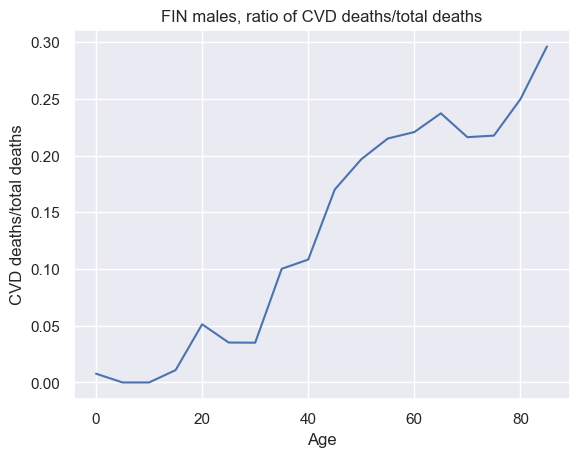

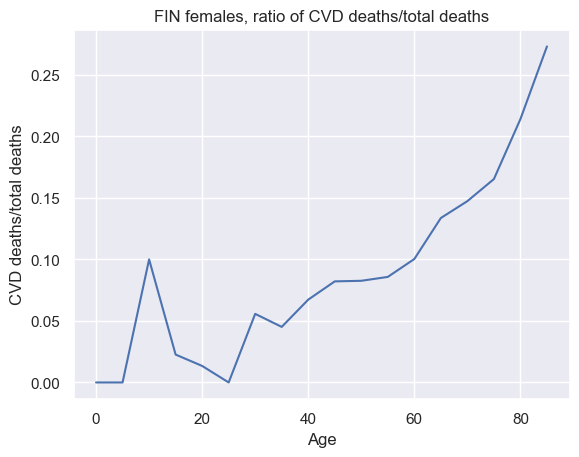

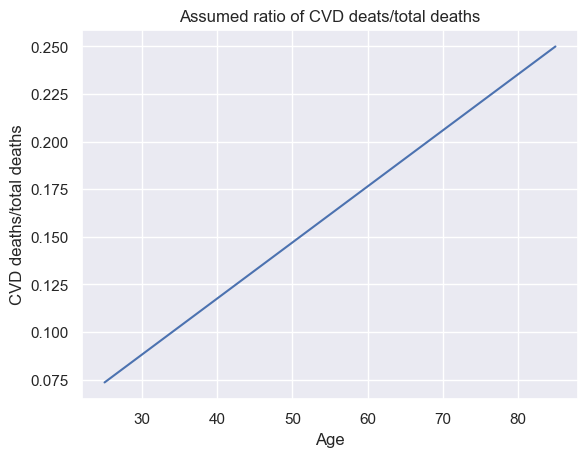

In [15]:
swe_cod = pd.read_csv("data/SWE_m_short_idr.csv")
swe_cod = swe_cod[swe_cod["cause"] != "S000"] # remove all cause mortality
swe_cod_agg = (
    swe_cod.drop(columns=["country", "list", "agf", "cause", "m95", "m95p", "m100p"])
    .groupby(["year", "sex"])
    .agg("sum")
    .reset_index()
)
swe_cvd = swe_cod[(swe_cod["cause"] == "S007") & (swe_cod["year"] == 2019) & (swe_cod["sex"] < 3)]
swe_cvd = pd.merge(swe_cvd, swe_cod_agg, on = ["year", "sex"])

r = swe_cvd[swe_cvd["sex"] == 1].reset_index()
sns.set()
plt.figure()
plt.plot(np.arange(0,86,5), [r.m0_x[0]/r.m0_y[0], r.m5_x[0]/r.m5_y[0], r.m10_x[0]/r.m10_y[0], r.m15_x[0]/r.m15_y[0], r.m20_x[0]/r.m20_y[0], r.m25_x[0]/r.m25_y[0], r.m30_x[0]/r.m30_y[0], r.m35_x[0]/r.m35_y[0], r.m40_x[0]/r.m40_y[0], r.m45_x[0]/r.m45_y[0], r.m50_x[0]/r.m50_y[0], r.m55_x[0]/r.m55_y[0], r.m60_x[0]/r.m60_y[0], r.m65_x[0]/r.m65_y[0], r.m70_x[0]/r.m70_y[0], r.m75_x[0]/r.m75_y[0], r.m80_x[0]/r.m80_y[0], r.m85_x[0]/r.m85_y[0]])
plt.title("FIN males, ratio of CVD deaths/total deaths")
plt.xlabel("Age")
plt.ylabel("CVD deaths/total deaths")
plt.show()

r = swe_cvd[swe_cvd["sex"] == 2].reset_index()
sns.set()
plt.figure()
plt.plot(np.arange(0,86,5), [r.m0_x[0]/r.m0_y[0], r.m5_x[0]/r.m5_y[0], r.m10_x[0]/r.m10_y[0], r.m15_x[0]/r.m15_y[0], r.m20_x[0]/r.m20_y[0], r.m25_x[0]/r.m25_y[0], r.m30_x[0]/r.m30_y[0], r.m35_x[0]/r.m35_y[0], r.m40_x[0]/r.m40_y[0], r.m45_x[0]/r.m45_y[0], r.m50_x[0]/r.m50_y[0], r.m55_x[0]/r.m55_y[0], r.m60_x[0]/r.m60_y[0], r.m65_x[0]/r.m65_y[0], r.m70_x[0]/r.m70_y[0], r.m75_x[0]/r.m75_y[0], r.m80_x[0]/r.m80_y[0], r.m85_x[0]/r.m85_y[0]])
plt.title("FIN females, ratio of CVD deaths/total deaths")
plt.xlabel("Age")
plt.ylabel("CVD deaths/total deaths")
plt.show()


cvd_ratio = ages/max_age*0.25

plt.figure()
plt.plot(ages, cvd_ratio)
plt.title("Assumed ratio of CVD deats/total deaths")
plt.xlabel("Age")
plt.ylabel("CVD deaths/total deaths")
plt.show()

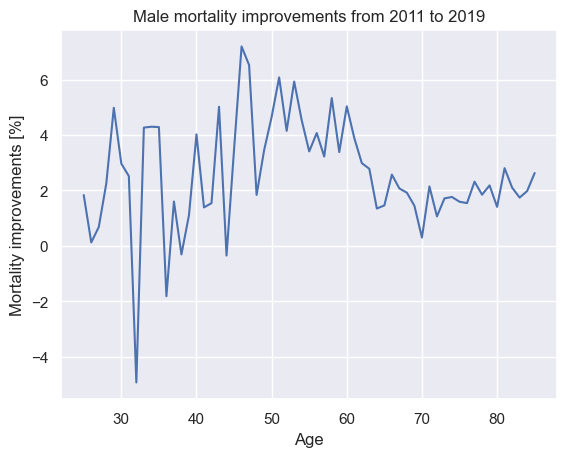

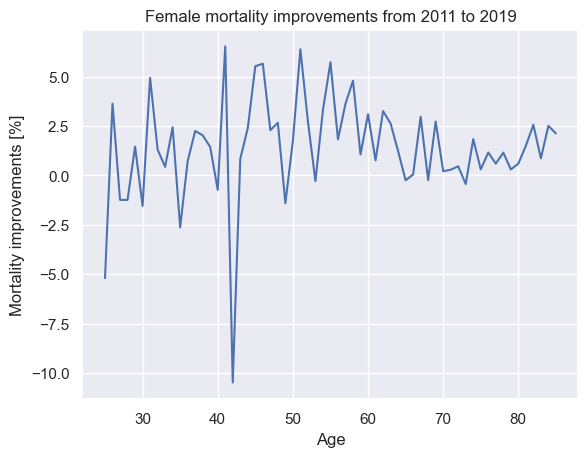

In [17]:
min_year = 2011
max_year = 2019

df = pd.read_csv("data/FIN_m.txt", sep='\s+', header=1)
df = df.loc[df["Age"] != "110+"]
df = df.copy()
df["Age"] = df["Age"].astype('int')
df = df.loc[(df["Year"] >= min_year) & (df["Year"] <= max_year) & (df["Age"] >=  min_age) & (df["Age"] <=  max_age)]
df = df[["Age", "Year", "qx"]]
df = df.sort_values(by=["Age", "Year"])

qx_m = np.array(df.qx[df["Year"] == max_year])

plt.figure()
plt.plot(ages, 100*(1-np.power(np.array(df.qx[df["Year"] == max_year])/np.array(df.qx[df["Year"] == min_year]), 1/(max_year-min_year))))
plt.title("Male mortality improvements from " + str(min_year) + " to " + str(max_year))
plt.xlabel("Age")
plt.ylabel("Mortality improvements [%]")
plt.show()

df = pd.read_csv("data/FIN_f.txt", sep='\s+', header=1)
df = df.loc[df["Age"] != "110+"]
df = df.copy()
df["Age"] = df["Age"].astype('int')
df = df.loc[(df["Year"] >= min_year) & (df["Year"] <= max_year) & (df["Age"] >=  min_age) & (df["Age"] <=  max_age)]
df = df[["Age", "Year", "qx"]]
df = df.sort_values(by=["Age", "Year"])

qx_f = np.array(df.qx[df["Year"] == max_year])

plt.figure()
plt.plot(ages, 100*(1-np.power(np.array(df.qx[df["Year"] == max_year])/np.array(df.qx[df["Year"] == min_year]), 1/(max_year-min_year))))
plt.title("Female mortality improvements from " + str(min_year) + " to " + str(max_year))
plt.xlabel("Age")
plt.ylabel("Mortality improvements [%]")
plt.show()

In [18]:
min_year = 2023
max_year = 2023

df = pd.read_csv("data/FIN_E.txt", sep='\s+', header=1)
df = df.loc[df["Age"] != "110+"]
df = df.copy()
df["Age"] = df["Age"].astype('int')
df = df.loc[(df["Year"] >= min_year) & (df["Year"] <= max_year) & (df["Age"] >=  min_age) & (df["Age"] <=  max_age)]
df = df[["Age", "Year", "Male", "Female"]]
df = df.sort_values(by=["Age", "Year"])

E_m = np.array(df["Male"])
E_f = np.array(df["Female"])

In [55]:
future_years = 30
E = E_m
qx = qx_m
mi = 1.5
poor_treatment = 0.5
cvd_mortality_vs_cvd_incidence_ratio = 1/6 # Toppila vs https://pmc.ncbi.nlm.nih.gov/articles/PMC10811545/
initial_pop = np.stack((E, np.zeros(E.shape[0]), np.zeros(E.shape[0]), np.zeros(E.shape[0]), np.zeros(E.shape[0])), axis=1)

def project(E=E, qx=qx, mi=mi, cvd_mortality_vs_cvd_incidence_ratio=cvd_mortality_vs_cvd_incidence_ratio, poor_treatment=poor_treatment, initial_pop=initial_pop):
    pop = np.zeros((E.shape[0], 5, future_years))
    pop[:,:,0] = initial_pop
    for t in np.arange(1, future_years):
        transition_probabilities = np.array([[0.99, 0, 0, 0, 0.01], [0, 0, 0, 0, 0], [0, 0, 0, 0, 0], [0, 0, 0, 0, 0], [0, 0, 0, 0, 0]]) # columnwise, healthy x CVD1 x poor treatment x CVD2+ x dead (first year only)
        for x in ages:
            qxt = qx[x-min_age]*np.power(1-mi/100,t-1)
            transition_probabilities[0,0] = 1 - qxt*(1-cvd_ratio[x-min_age]) - np.min((0.3, qxt*cvd_ratio[x-min_age]/cvd_mortality_vs_cvd_incidence_ratio))
            transition_probabilities[0,1] = np.min((0.3, qxt*cvd_ratio[x-min_age]/cvd_mortality_vs_cvd_incidence_ratio))
            transition_probabilities[0,4] = qxt*(1-cvd_ratio[x-min_age])
            transition_probabilities[1,1] = 0.9  # Toppila: 41.5% died or suffered a recurrent event after 5 years
            transition_probabilities[1,3] = 0.04 # Toppila: ignoring 1.02 hazard ratio of age
            transition_probabilities[1,4] = 0.06 # Toppila: 61.5% was the most common subsequent event
            transition_probabilities[1,2] = poor_treatment
            transition_probabilities[2,4] = 0.08 # Double incidence rate for poor treatment
            transition_probabilities[2,4] = 0.12 # Double mortality rate for poor treatment
            transition_probabilities[3,3] = 0.95 # Toppila: (1-1053/4848)^(1/5)
            transition_probabilities[3,4] = 0.05
            if x == min_age:
                pop[0,:,t] = pop[0,:,t-1]
                continue
            pop[x-min_age,:,t] = np.matmul(pop[x-min_age-1,:,t-1], transition_probabilities)
    return pop

pop = project()

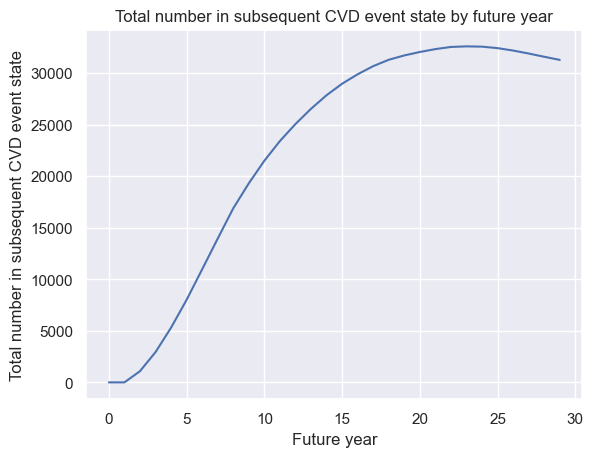

In [58]:
plt.figure()
plt.plot(np.arange(future_years), np.sum(pop[:,3,:], axis=0))
plt.title("Total number in subsequent CVD event state by future year")
plt.xlabel("Future year")
plt.ylabel("Total number in subsequent CVD event state")
plt.show()

initial_pop = np.stack((E, np.zeros(E.shape[0]), np.zeros(E.shape[0]), np.zeros(E.shape[0])), axis=1)
initial_pop[:,1:4] = initial_pop[:,0][:, np.newaxis]*pop[:,1:4,20]/pop[:,0,20][:, np.newaxis] # use previous run as warmup phase to get an approximate initial state distribution

pop = project()
pop_alt = project(poor_treatment=0.4)

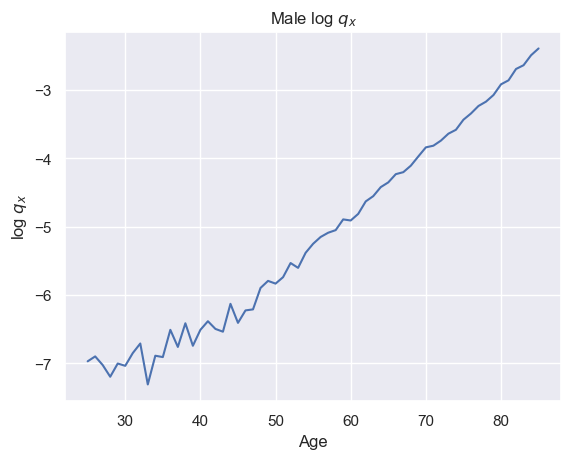

In [59]:
plt.figure()
plt.plot(ages, np.log(qx_m))
plt.title("Male log $q_x$")
plt.xlabel("Age")
plt.ylabel("log $q_x$")
plt.show()

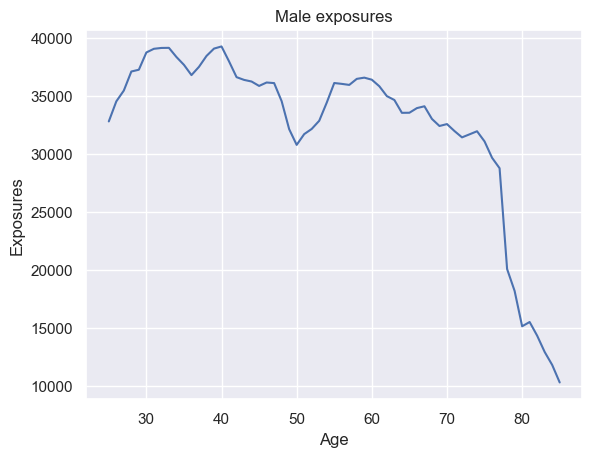

In [60]:
plt.figure()
plt.plot(ages, E_m)
plt.title("Male exposures")
plt.xlabel("Age")
plt.ylabel("Exposures")
plt.show()

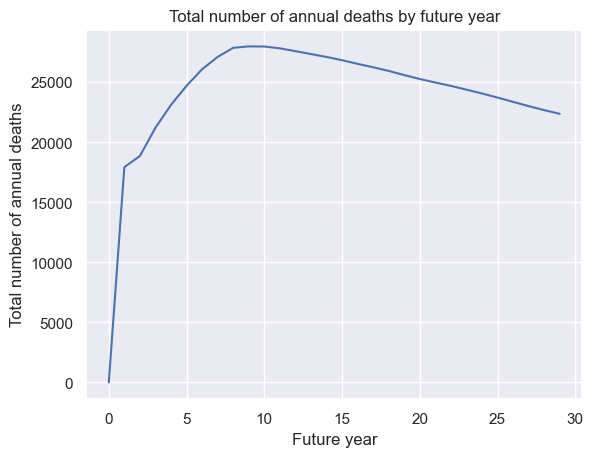

In [61]:
plt.figure()
plt.plot(np.arange(future_years), np.sum(pop[:,4,:], axis=0))
plt.title("Total number of annual deaths by future year")
plt.xlabel("Future year")
plt.ylabel("Total number of annual deaths")
plt.show()

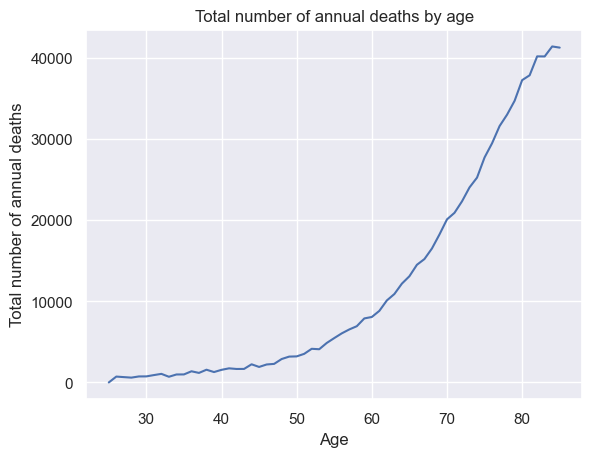

In [62]:
plt.figure()
plt.plot(ages, np.sum(pop[:,4,:], axis=1))
plt.title("Total number of annual deaths by age")
plt.xlabel("Age")
plt.ylabel("Total number of annual deaths")
plt.show()

In [64]:
    import plotly
    plotly.offline.init_notebook_mode(connected=True)
    
    fig = go.Figure(data=[go.Surface(z=pop[:,4,:], y=ages, x=np.arange(future_years), colorscale ="Picnic")])
    fig.update_traces(contours_z=dict(show=True, usecolormap=True, 
                    highlightcolor="limegreen", project_z=True))
    fig.update_layout(title='Number of annual deaths',
                    autosize=True,
                    scene = dict(       
                    xaxis_title="Future_year",
                    yaxis_title="Age",
                    zaxis_title="Number of annual deaths"),
                    scene_aspectratio=dict(x=1, y=1, z=1))
    fig.show(renderer='iframe')

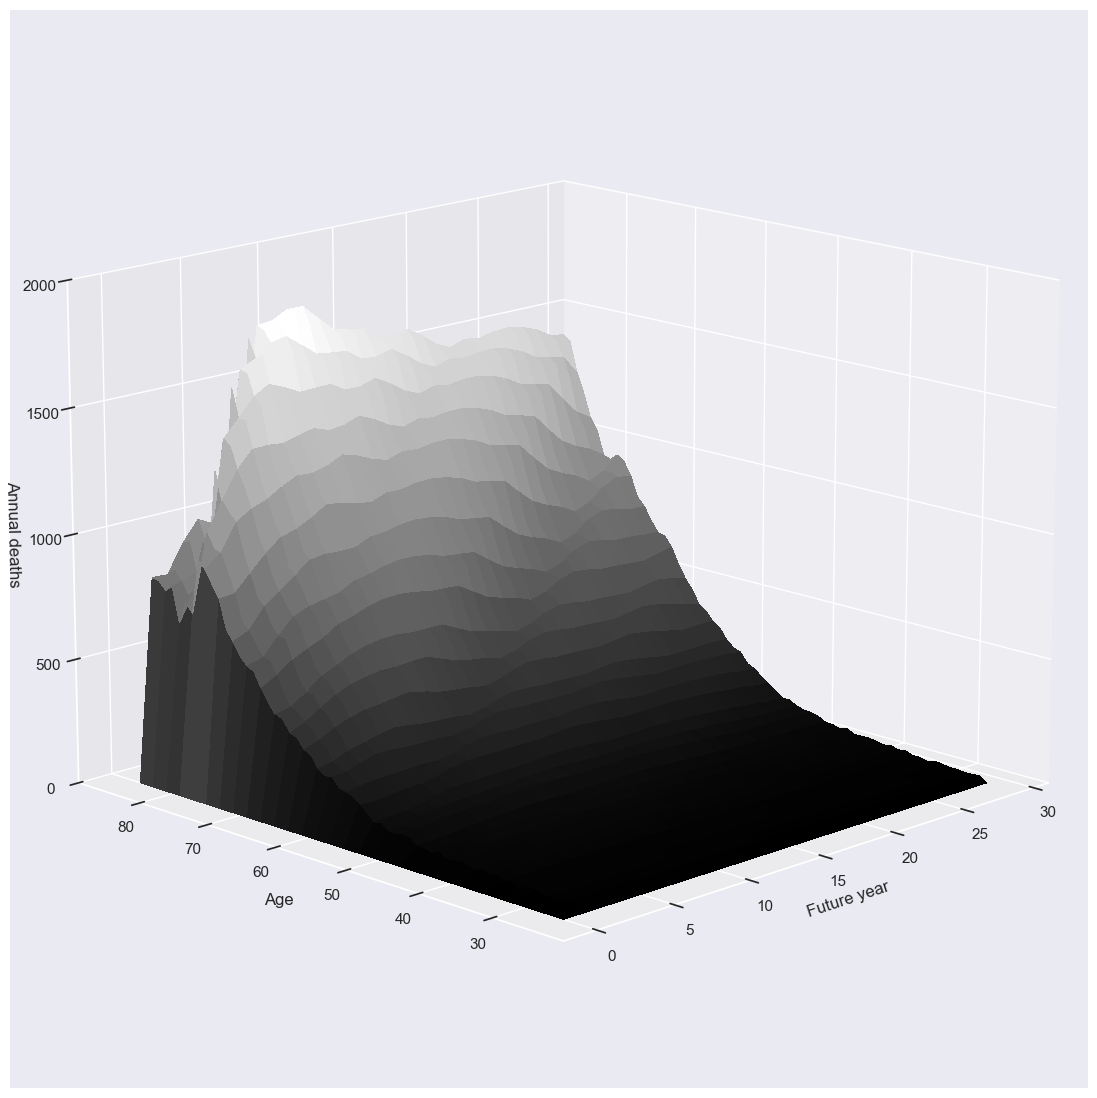

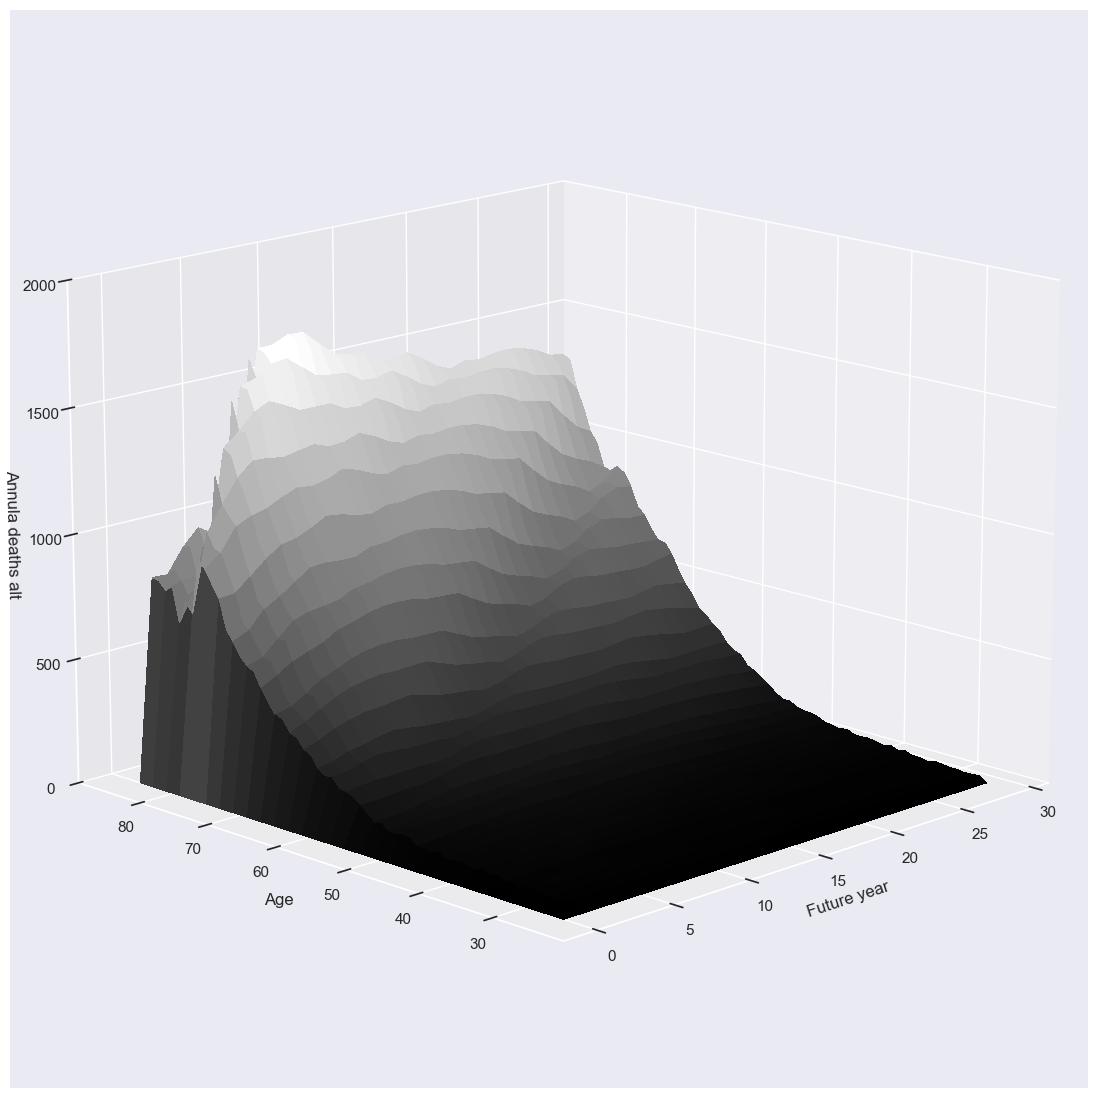

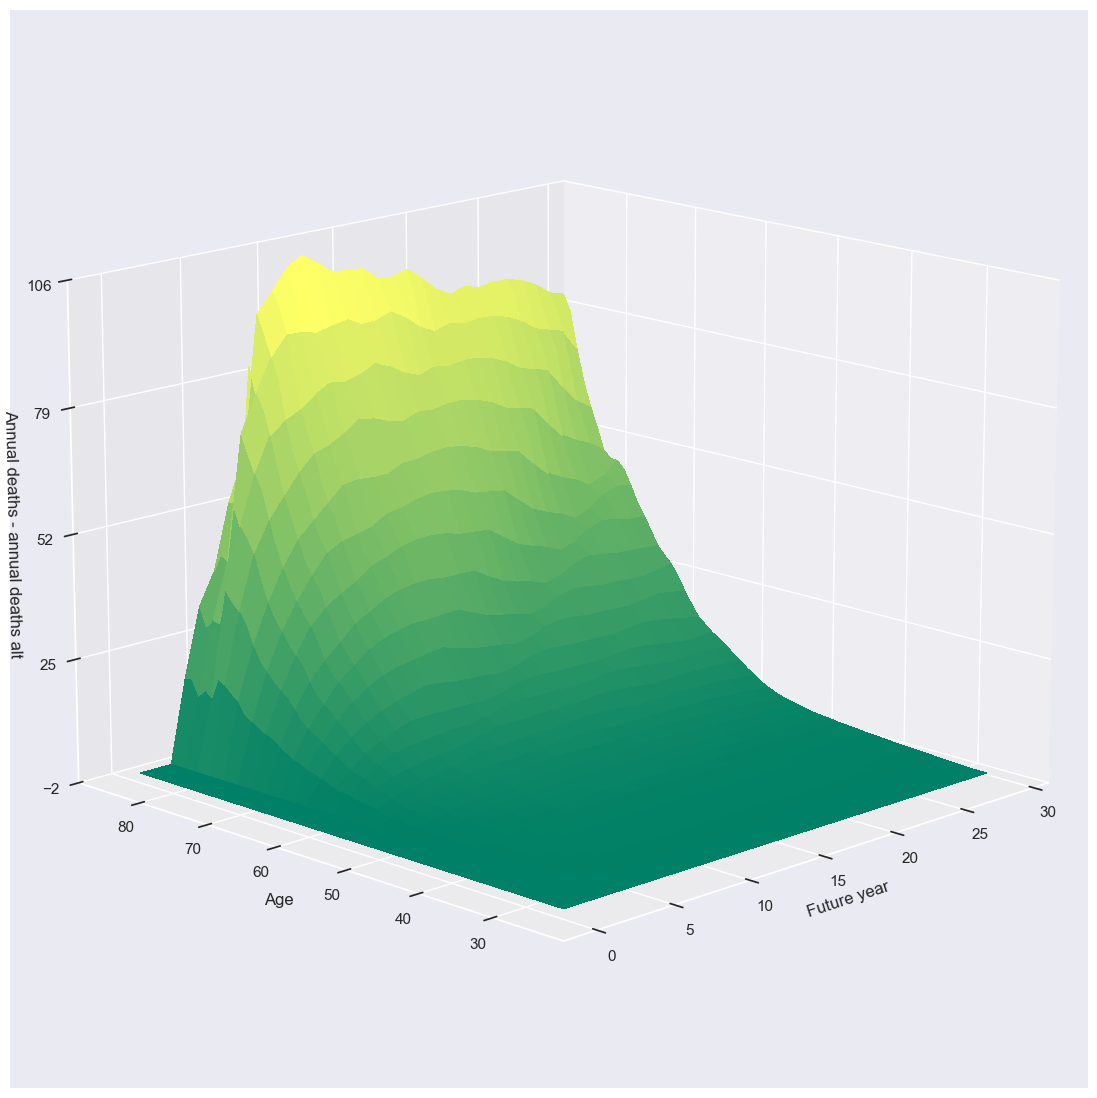

In [72]:
fig, ax = plt.subplots(subplot_kw={"projection": "3d"}, figsize=(14,14))
X, Y = np.meshgrid(np.arange(future_years), ages)
Z = pop[:,4,:]
surf = ax.plot_surface(X, Y, Z, cmap=cm.grey, linewidth=0, antialiased=False)
ax.set_xlabel("Future year")
ax.set_ylabel("Age")
ax.set_zlabel("Annual deaths")
ax.set_zlim(0, 2000)
ax.zaxis.set_major_locator(LinearLocator(5))
ax.zaxis.set_major_formatter('{x:.0f}')
ax.view_init(elev=15., azim=-135)
plt.show()

fig, ax = plt.subplots(subplot_kw={"projection": "3d"}, figsize=(14,14))
X, Y = np.meshgrid(np.arange(future_years), ages)
Z = pop_alt[:,4,:]
surf = ax.plot_surface(X, Y, Z, cmap=cm.grey, linewidth=0, antialiased=False)
ax.set_xlabel("Future year")
ax.set_ylabel("Age")
ax.set_zlabel("Annula deaths alt")
ax.set_zlim(0, 2000)
ax.zaxis.set_major_locator(LinearLocator(5))
ax.zaxis.set_major_formatter('{x:.0f}')
ax.view_init(elev=15., azim=-135)
plt.show()

fig, ax = plt.subplots(subplot_kw={"projection": "3d"}, figsize=(14,14))
X, Y = np.meshgrid(np.arange(future_years), ages)
Z = pop[:,4,:] - pop_alt[:,4,:]
surf = ax.plot_surface(X, Y, Z, cmap=cm.summer, linewidth=0, antialiased=False)
ax.set_xlabel("Future year")
ax.set_ylabel("Age")
ax.set_zlabel("Annual deaths - annual deaths alt")
ax.zaxis.set_major_locator(LinearLocator(5))
ax.zaxis.set_major_formatter('{x:.0f}')
ax.view_init(elev=15., azim=-135)
plt.show()